<img src="https://unal.edu.co/_assets/ca8e1ca9a551c3e3ffc233b30e54ba93/images/escudoUnal.svg" width="800" height="500">

# LABORATORIO 1

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-14


# 2. Conversión D/A: Reconstrucción de señales a partir de sus muestras

#### Actividades:
##### 2.1 📝 Recrea el proceso de reconstrucción de una señal cuadrada con una frecuencia de 60 Hz, la cual ha sido muestreada con una velocidad (FS) de 1080 Hz. Debes usar la función generadora propuesta en la Ecuación (2), y seleccionar además un criterio para escoger un rango representativo de tiempos para dicha función generadora.

<img src="../img/ecuaciones.png">



## ✅ Resultado:

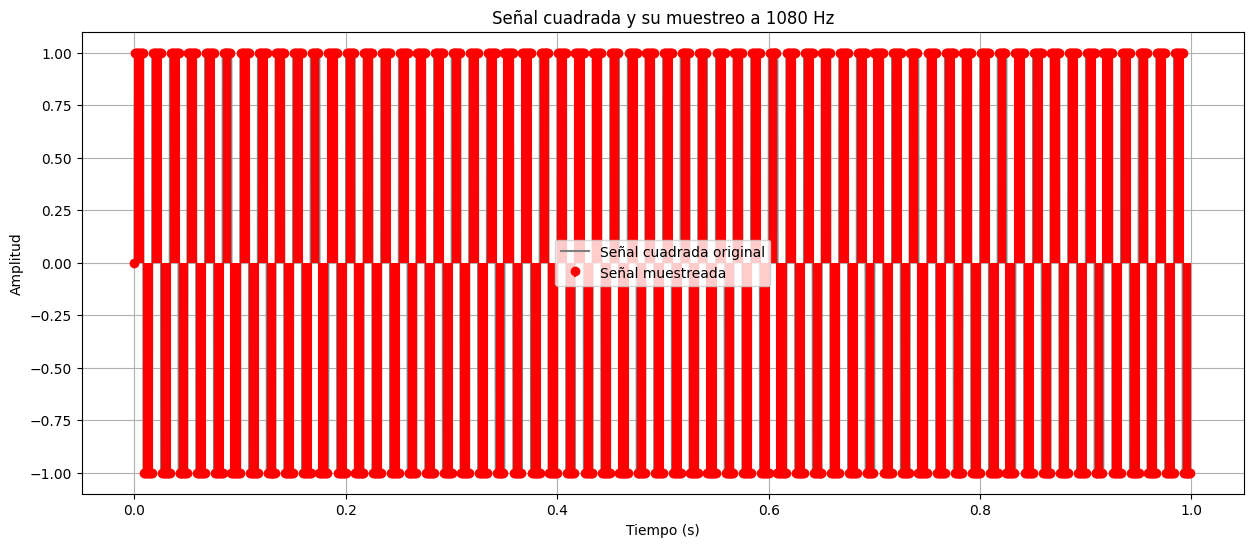

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
frecuencia_señal = 60  # Hz
FS = 1080  # Hz, frecuencia de muestreo

# Generar la señal cuadrada original
t = np.linspace(0, 1, 10000, endpoint=False)  # 1 segundo de señal, alta resolución para simular señal continua
señal_cuadrada = np.sign(np.sin(2 * np.pi * frecuencia_señal * t))

# Muestreo de la señal cuadrada
t_muestreo = np.arange(0, 1, 1/FS)  # Puntos de muestreo basados en FS
señal_muestreada = np.sign(np.sin(2 * np.pi * frecuencia_señal * t_muestreo))

# Visualización de la señal cuadrada y la señal muestreada
plt.figure(figsize=(15, 6))

# Señal cuadrada original
plt.plot(t, señal_cuadrada, label='Señal cuadrada original', color='grey')

# Señal muestreada
plt.stem(t_muestreo, señal_muestreada, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='Señal muestreada')

plt.title('Señal cuadrada y su muestreo a 1080 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


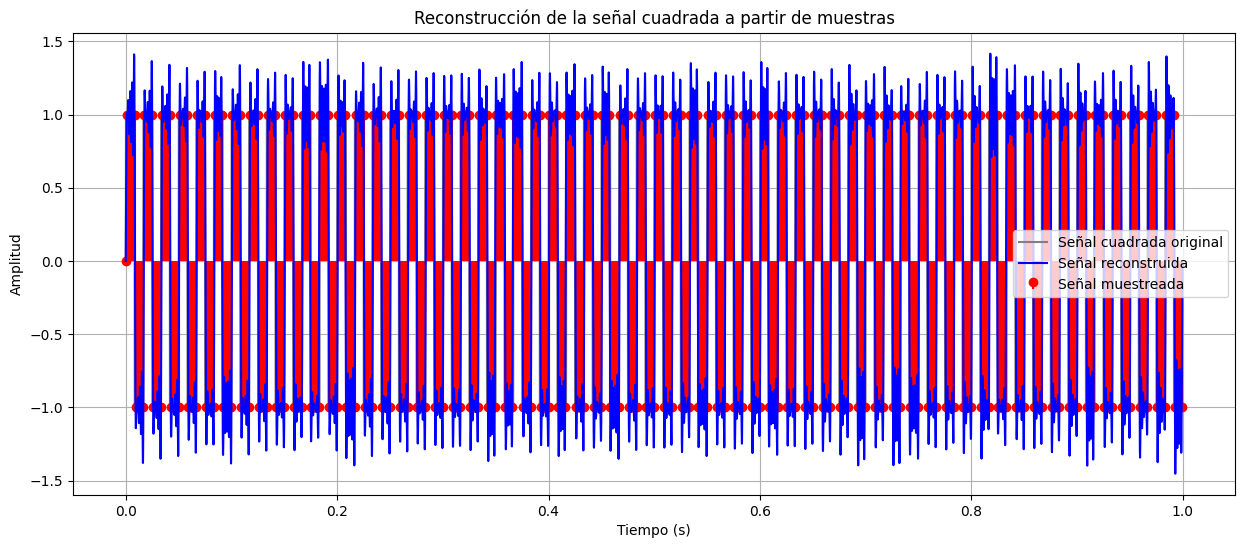

In [23]:
# Función para calcular la reconstrucción de la señal usando la función sinc
def reconstruir_señal(t, t_muestreo, señal_muestreada, FS):
    reconstruccion = np.zeros_like(t)
    for n, sample in enumerate(señal_muestreada):
        reconstruccion += sample * np.sinc(FS * (t - n/FS))
    return reconstruccion

# Reconstruir la señal
señal_reconstruida = reconstruir_señal(t, t_muestreo, señal_muestreada, FS)

# Visualizar la señal reconstruida junto con la señal original y la muestreada
plt.figure(figsize=(15, 6))

# Señal cuadrada original
plt.plot(t, señal_cuadrada, label='Señal cuadrada original', color='grey')

# Señal muestreada
plt.stem(t_muestreo, señal_muestreada, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='Señal muestreada')

# Señal reconstruida
plt.plot(t, señal_reconstruida, label='Señal reconstruida', color='blue')

plt.title('Reconstrucción de la señal cuadrada a partir de muestras')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


Para reconstruir una señal cuadrada de 60 Hz que ha sido muestreada a una frecuencia de muestreo (FS) de 1080 Hz, podemos usar la función sinc, también conocida como función generadora g(t), definida por la ecuación:

$$g(t) = \frac{\sin(\pi \cdot FS \cdot t)}{\pi \cdot FS \cdot t}$$

La reconstrucción de la señal se hará mediante la suma de funciones sinc desplazadas y escaladas, basadas en los valores de la señal muestreada. El criterio para elegir un rango representativo de tiempos para la función generadora dependerá de la precisión deseada y la extensión del intervalo de tiempo en el que queremos reconstruir la señal. Para una reconstrucción precisa, es común elegir un rango de tiempo que cubra varios períodos de la señal original.

Pasos para la reconstrucción:

Generar la señal cuadrada original: Dado que la frecuencia de la señal cuadrada es de 60 Hz, podemos simular su comportamiento en un intervalo de tiempo adecuado para observar varios ciclos de la señal.
Muestreo de la señal cuadrada: Muestrearemos esta señal a 1080 Hz para obtener los valores discretos.
Reconstrucción usando la función sinc: Para reconstruir la señal, sumaremos las funciones sinc desplazadas y escaladas en función de los valores muestreados de la señal cuadrada. Esto implica calcular la suma de (g(t - n/FS)) escalada por los valores de la señal muestreada, donde (n) es el índice del valor muestreado.
Elección del rango de tiempos: Para una reconstrucción efectiva, se considerará un rango de tiempo que incluya varios ciclos de la señal cuadrada, usualmente eligiendo un intervalo que abarque de -5 a 5 veces el período de la señal cuadrada, aunque este rango puede ajustarse según la necesidad específica.

# ***************************************************************************************

##### 2.2 📝 Compara los resultados obtenidos con una reconstrucción basada en pulsos cuadrados como función generadora (es decir, el método de Muestreo y Retención). ¿Qué se puede decir con respecto a la calidad de la reconstrucción en cada caso? ¿Por qué los conversores D/A comerciales se basan en la reconstrucción por pulsos?